# Insights of Delhivery

Dataset from 'path/data/delhivery.csv'

In [1]:
# Initial Package to load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# API Nominatim package
from geopy.geocoders import Nominatim
# Delay library
import time

# Geospatial package
import folium
# Machine learning library
from sklearn.cluster import KMeans

# Plotly express API graphs package 
import plotly.express as px
import plotly.graph_objects as go 

# Google maps API package
import googlemaps

# datatime module
from datetime import datetime


# Observación

## Lectura de datos

In [2]:
# Read data
data = pd.read_csv('/Users/luigi/Documents/Data_Analysis_Folio/Delhivery_Logistics_DataAnalysis/data/delhivery.csv')
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# Procesamiento de datos

## Características de los datos

In [3]:
data.shape

(144867, 24)

In [4]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Limpieza de datos

## Descriptiva estadística de mi dataset 

In [6]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


### Suma de valores nulos en cada columna 

In [7]:
# Sum of Null values in each columns 
incomplete_values = data.isnull().sum()
incomplete_values

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

### Eliminando columnas con valores faltantes para nuestro análisis

In [8]:
# Define var dataframe
df = data
# Clean NULL data from source_name and destination_name 
df.dropna(inplace=True)
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

### Ordernando columnas por tipo de dato

In [9]:
# Get numeric and categorical data in list format from dataframe 
numeric_data = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_data = df.select_dtypes(include=['bool', 'object']).columns.tolist()

print("Numeric columns:", numeric_data)
print("\nCategorical columns:", categorical_data)

Numeric columns: ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']

Categorical columns: ['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'od_start_time', 'od_end_time', 'is_cutoff', 'cutoff_timestamp']


# Análisis de datos

## Cantidad de servicios por tipo de ruta

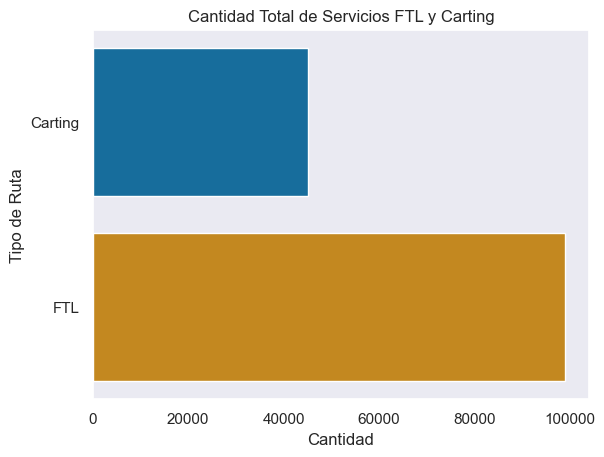

In [10]:
# Plot style 
sns.set_theme(style='dark')

# Plot route_type vs counts of services FTL and Carting
sns.countplot(y='route_type', data=df, palette='colorblind', hue='route_type', legend=False)
plt.title('Cantidad Total de Servicios FTL y Carting')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Ruta')
plt.show()


## Distribución de los tipos de rutas en función del tiempo y la distancia

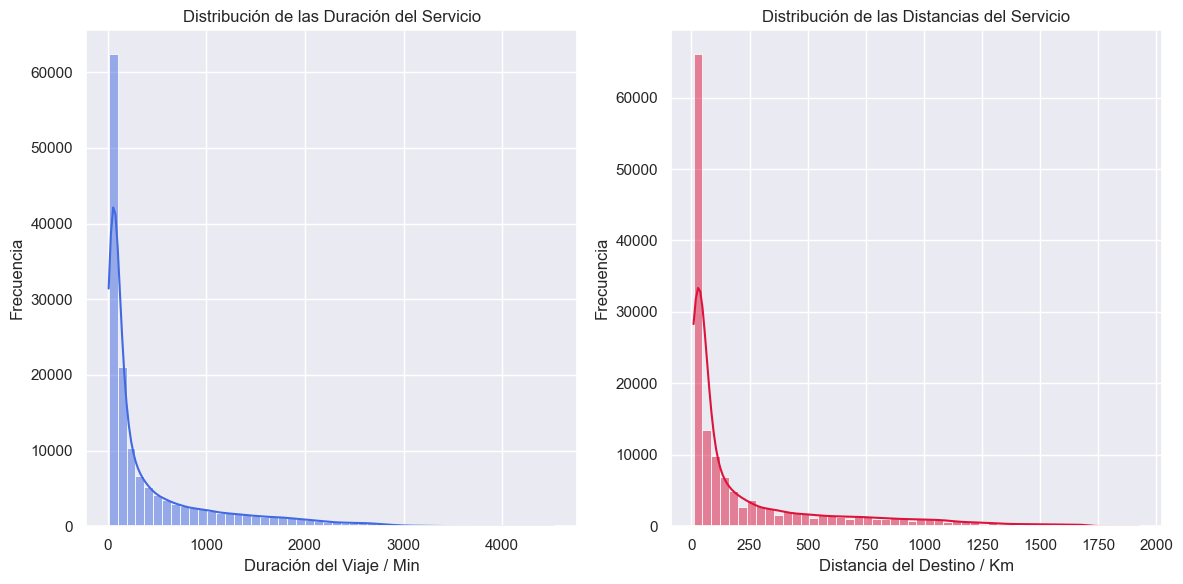

In [71]:
#set plot style
sns.set_theme(style='darkgrid')

# Set subplot 
fig, axes = plt.subplots(1,2, figsize=(12,6)) # Define one row and two column

# Plot Distribution of trip duration
sns.histplot(df['actual_time'], bins=50, kde='true', ax=axes[0], color='royalblue')
axes[0].set_title('Distribución de las Duración del Servicio')
axes[0].set_xlabel('Duración del Viaje / Min')
axes[0].set_ylabel('Frecuencia')

# Plot Distribution of trip distance
sns.histplot(df['actual_distance_to_destination'], bins=50, kde='true', ax=axes[1], color='crimson')
axes[1].set_title('Distribución de las Distancias del Servicio')
axes[1].set_xlabel('Distancia del Destino / Km')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Relación entre la duración y la distancia del recorrido

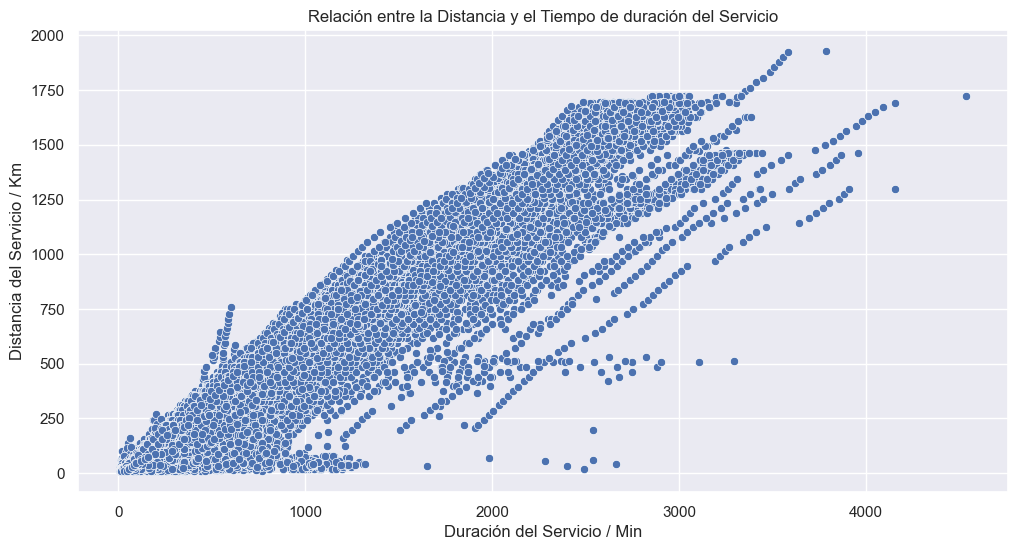

In [12]:
# Set plot style
sns.set_theme(style='darkgrid')

# Plot relationship duration and distance trip 
plt.figure(figsize=(12,6))
sns.scatterplot(x='actual_time', y='actual_distance_to_destination', data=df)
plt.title('Relación entre la Distancia y el Tiempo de duración del Servicio')
plt.ylabel('Distancia del Servicio / Km')
plt.xlabel('Duración del Servicio / Min')
plt.show()

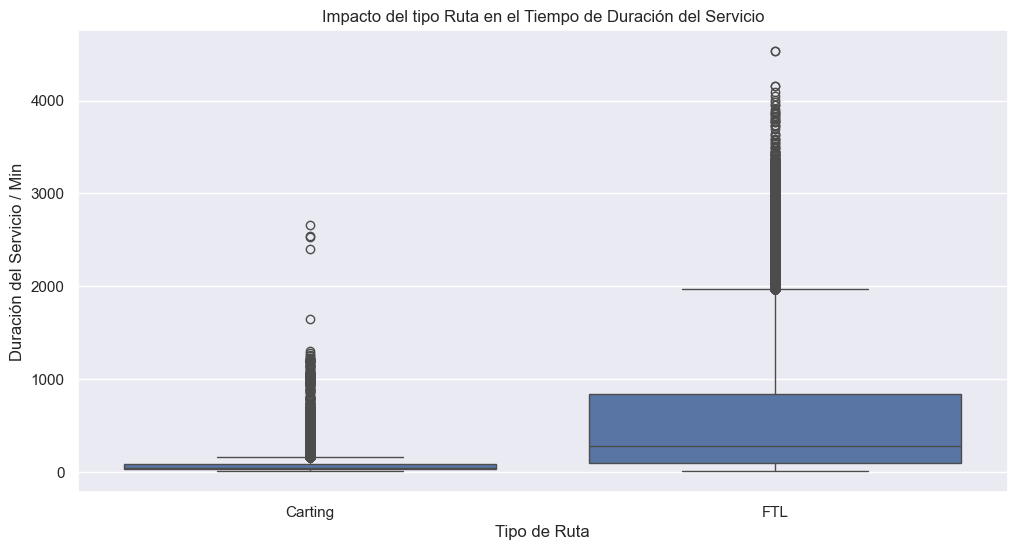

In [13]:
# Set plot style
sns.set_theme(style='darkgrid')

# Plot impact route type in trip duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='route_type', y='actual_time', data=df)
plt.title('Impacto del tipo Ruta en el Tiempo de Duración del Servicio')
plt.ylabel('Duración del Servicio / Min')
plt.xlabel('Tipo de Ruta')
plt.show()

## Análisis de estados con el mayor número de tipos de ruta FTL y Carting

In [14]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Formatos de hora y fecha

#### Esto nos va a ayudar más delante para crear y manipular objetos de fecha y hora, permitiendonos realizar distintas operaciones dentro de nuestro análisis y el despliegue de diferentes graficas que nos permiten visualizar los resultados de manera eficiente.

In [15]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['initial_format_time'] = df['od_start_time'].dt.strftime('%H:%M:%S')
df['initial_format_date'] = df['od_start_time'].dt.date
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['final_format_time'] = df['od_end_time'].dt.strftime('%H:%M:%S')
df['final_format_date'] = df['od_end_time'].dt.date

df.drop(columns=['od_start_time', 'od_end_time'], inplace=True) 

## Cantidad de valores únicos por ID de los recorrridos

#### Existen filas con valores que tienen un mismo identicador único ó ID, siendo estos valores de viajes que se realizaron en el mismo estado pero tuvieron variaciones en los recorridos. Estos valores pueden causar impresición y generar un sesgo en el análisis de datos.

In [16]:
# Get unique values for trip_uuid 
df['trip_uuid'].nunique()

14787

#### Agrupando únicos valores por ID

In [17]:
# Grouped dataframe in function of column trip_uuid
df_groupedby_ID = df.groupby('trip_uuid')

#### Al organizar los valores en función de su ID único, se puede observar que existen trayectorias que tienen el mismo identificador único, pero se mueven por distintas rutas 

## Normalizando los datos

In [18]:
# Get a new dataframe with 
df_agg_data = df_groupedby_ID.agg ({
    'route_type': 'first', 
    'source_name': 'first', 
    'destination_name': 'first',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'segment_actual_time': 'mean',
    'segment_osrm_distance': 'mean',
    'segment_osrm_time': 'mean',
    'initial_format_time':'first',
    'initial_format_date': 'first'
}).reset_index()

df_agg_data

,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_time,initial_format_date
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,00:00:16,2018-09-12
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,00:00:22,2018-09-12
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,00:00:33,2018-09-12
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,00:01:00,2018-09-12
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,00:02:09,2018-09-12
...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,23:55:56,2018-10-03
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,23:57:23,2018-10-03
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,23:57:44,2018-10-03
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,23:59:14,2018-10-03


### Extrayendo carácteres de tipo "string" de las columnas source_name y destination_name

In [19]:
df_agg_data['source_state'] = df_agg_data['source_name'].str.extract(r'\((.*?)\)')
df_agg_data['destination_state'] = df_agg_data['destination_name'].str.extract(r'\((.*?)\)')
df_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14787 non-null  object 
 1   route_type                      14787 non-null  object 
 2   source_name                     14787 non-null  object 
 3   destination_name                14787 non-null  object 
 4   actual_distance_to_destination  14787 non-null  float64
 5   actual_time                     14787 non-null  float64
 6   segment_actual_time             14787 non-null  float64
 7   segment_osrm_distance           14787 non-null  float64
 8   segment_osrm_time               14787 non-null  float64
 9   initial_format_time             14787 non-null  object 
 10  initial_format_date             14787 non-null  object 
 11  source_state                    14787 non-null  object 
 12  destination_state               

In [20]:
df_agg_data

,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_time,initial_format_date,source_state,destination_state
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,00:00:16,2018-09-12,Madhya Pradesh,Uttar Pradesh
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,00:00:22,2018-09-12,Karnataka,Karnataka
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,00:00:33,2018-09-12,Karnataka,Haryana
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,00:01:00,2018-09-12,Maharashtra,Maharashtra
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,00:02:09,2018-09-12,Karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,23:55:56,2018-10-03,Punjab,Punjab
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,23:57:23,2018-10-03,Haryana,Haryana
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,23:57:44,2018-10-03,Uttar Pradesh,Uttar Pradesh
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,23:59:14,2018-10-03,Tamil Nadu,Tamil Nadu


## Análisis exploratorio de la ruta carting

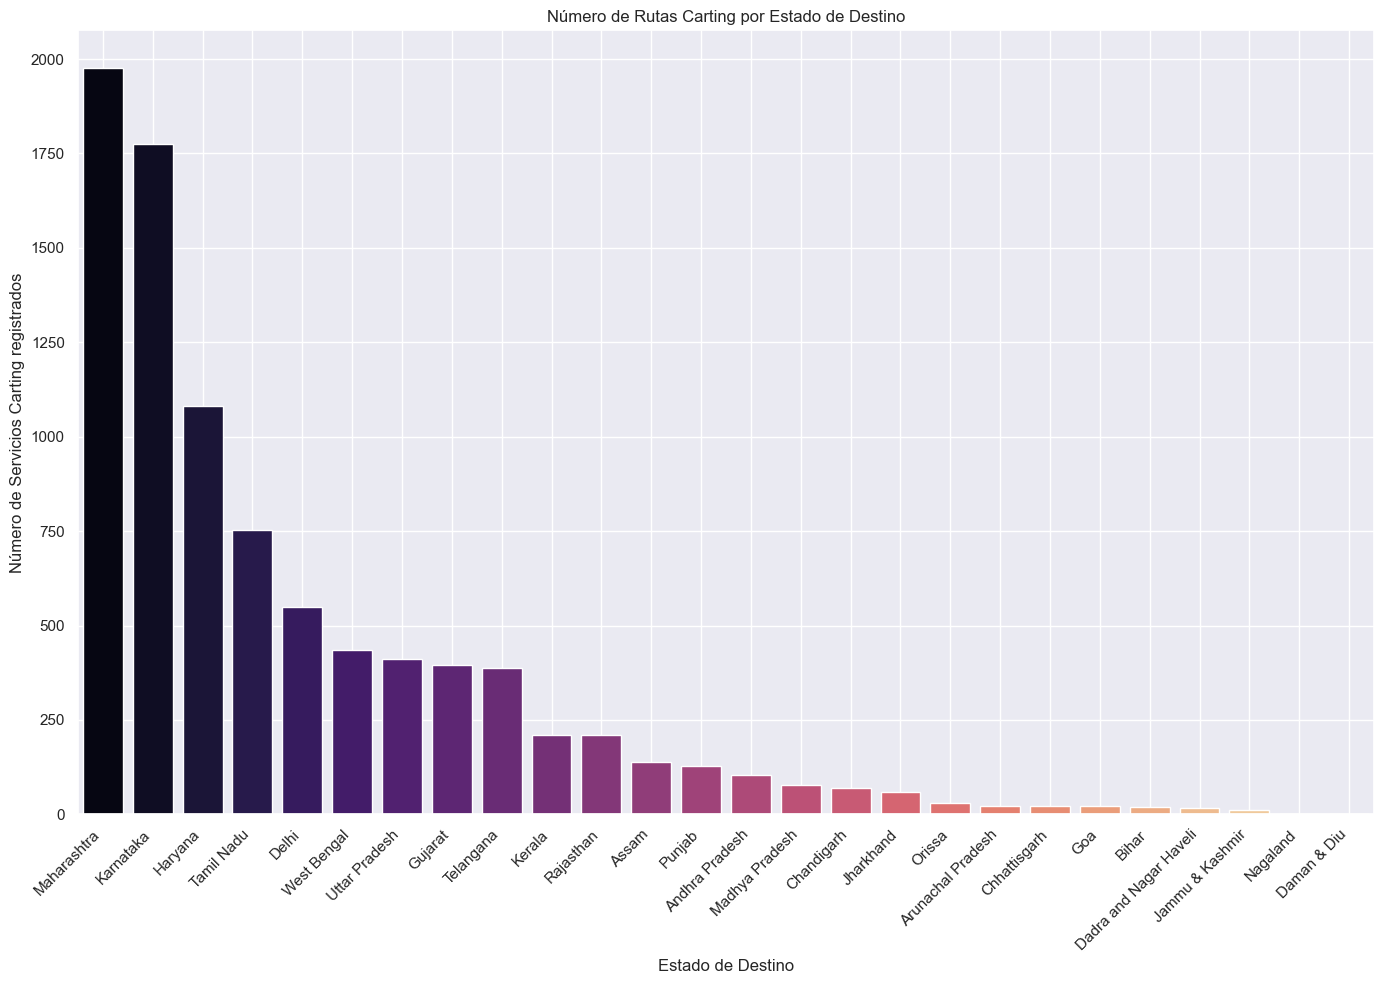

In [21]:
# Define Carting rows from route_type column
route_carting = df_agg_data[df_agg_data['route_type'] == 'Carting']

# Get value counts from destination_state 
df_carting_counts = route_carting['source_state'].value_counts().reset_index()
df_carting_counts.columns = ['source_state', 'number_source_services']

df_carting = route_carting['destination_state'].value_counts().reset_index()
df_carting.columns = ['destination_state', 'number_destination_services']

# Set plot style
sns.set_style(style='dark')

# Barplot destination_state vs number_trips
plt.figure(figsize=(14,10))
sns.barplot(x='destination_state', y='number_destination_services', data=df_carting, palette='magma', hue='destination_state', legend=False)
plt.xticks(rotation=45, ha='right') #name state
plt.title('Número de Rutas Carting por Estado de Destino')
plt.xlabel('Estado de Destino')
plt.ylabel('Número de Servicios Carting registrados')
plt.tight_layout()
plt.grid()
plt.show()

## Análisis exploratorio de la ruta FTL

### Clasificando filas con route type igual a FTL

In [22]:
# Define FTL rows from route_type column
route_FTL = df_agg_data[df_agg_data['route_type'] == 'FTL']
# Group FTL trips by source_state and destination_state
groupby_FTL = route_FTL.groupby(['source_state', 'destination_state'])
# Get datatype of groupby_FTL
datatype_data = type(groupby_FTL)
print(datatype_data)



<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


## Cantidad de recorridos en los estados de origen y destino

In [23]:
# Result dataframe 
df_FTL_services = groupby_FTL.size().reset_index(name='number_FTL_services')
df_FTL_services

,source_state,destination_state,number_FTL_services
0,Andhra Pradesh,Andhra Pradesh,265
1,Andhra Pradesh,Karnataka,14
2,Andhra Pradesh,Orissa,2
3,Andhra Pradesh,Telangana,16
4,Assam,Arunachal Pradesh,1
...,...,...,...
122,West Bengal,Bihar,1
123,West Bengal,Haryana,11
124,West Bengal,Jharkhand,20
125,West Bengal,Orissa,27


In [24]:
# Max value for number_trips column
df_FTL_services['number_FTL_services'].max()

np.int64(452)

### "Pivoteando" valores con el número de destinos para los estados de origen y detino

In [25]:
heatmap_FTL = df_FTL_services.pivot(index='source_state', columns='destination_state', values='number_FTL_services').fillna(0)

## Mapa de calor con el número de viajes FTL Estado de Origen vs Estado de Destino

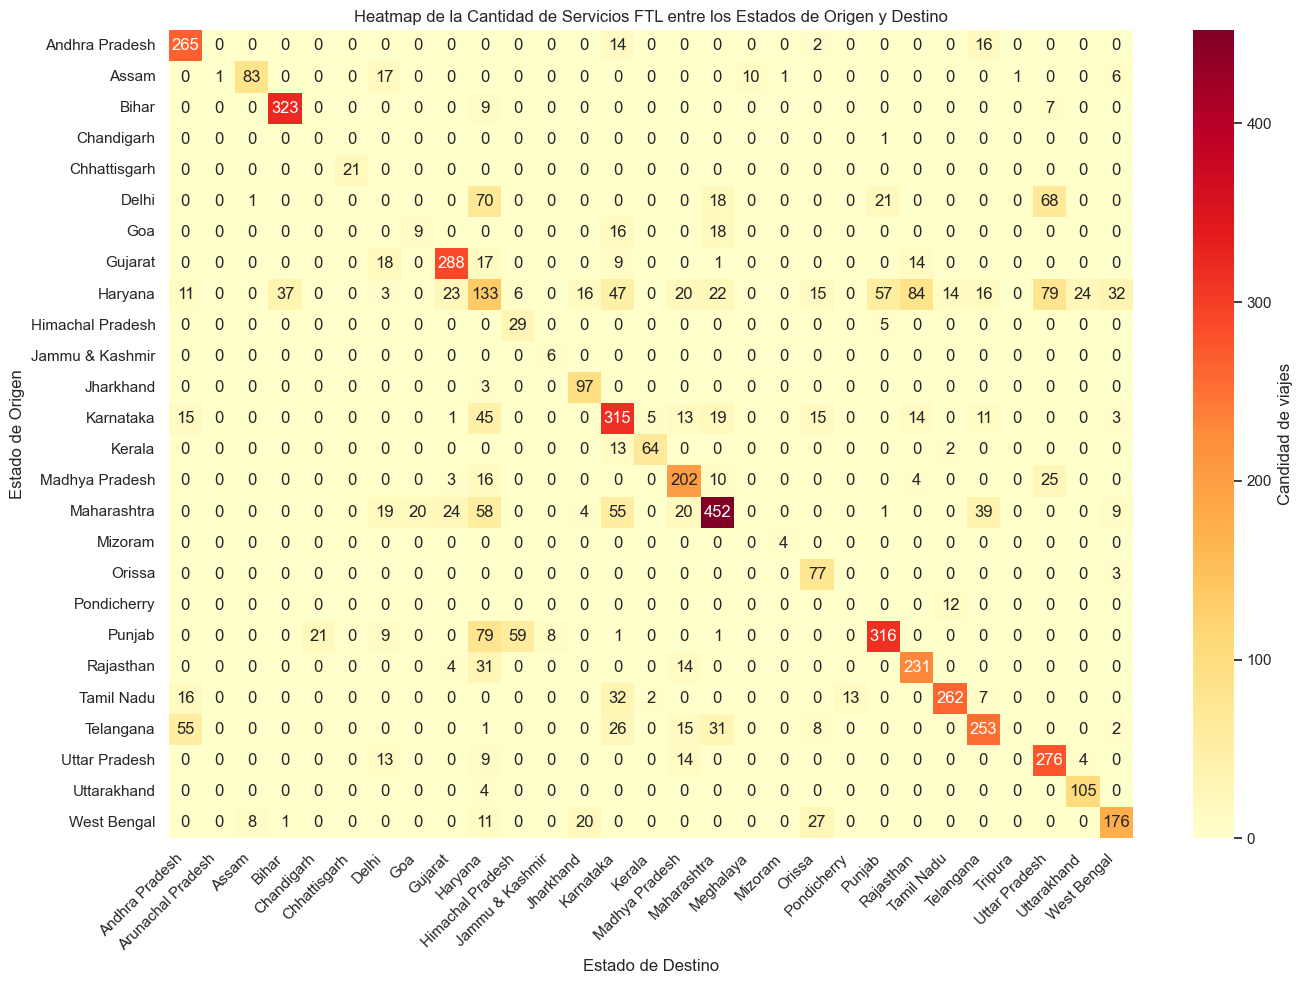

In [26]:
plt.figure(figsize=(14, 10))

# Heatmap plot
sns.heatmap(data=heatmap_FTL, cmap='YlOrRd', annot=True, fmt=".0f", cbar_kws={'label': 'Candidad de viajes'})
plt.title('Heatmap de la Cantidad de Servicios FTL entre los Estados de Origen y Destino')
plt.ylabel('Estado de Origen')
plt.xlabel('Estado de Destino')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualización de los estados en mapas identificando los clusters de las rutas con el algoritmo NO supervisado K-Means

In [27]:
df_carting['destination_state']

0                Maharashtra
1                  Karnataka
2                    Haryana
3                 Tamil Nadu
4                      Delhi
5                West Bengal
6              Uttar Pradesh
7                    Gujarat
8                  Telangana
9                     Kerala
10                 Rajasthan
11                     Assam
12                    Punjab
13            Andhra Pradesh
14            Madhya Pradesh
15                Chandigarh
16                 Jharkhand
17                    Orissa
18         Arunachal Pradesh
19              Chhattisgarh
20                       Goa
21                     Bihar
22    Dadra and Nagar Haveli
23           Jammu & Kashmir
24                  Nagaland
25               Daman & Diu
Name: destination_state, dtype: object

In [28]:
# Var states adress
state_address = ["Maharashtra", "Karnataka", "Haryana", "Tamil Nadu", "Delhi", "West Bengal", "Uttar Pradesh", "Gujarat", "Telangana", "Kerala", "Rajasthan", "Assam", "Punjab", "Andhra Pradesh", "Madhya Pradesh", "Chandigarh", "Jharkhand", "Orissa", "Chhattisgarh", "Goa", "Bihar", "Dadra and Nagar Haveli", "Jammu & Kashmir", "Nagaland", "Daman & Diu", "Uttarakhand", "Himachal Pradesh", "Arunachal Pradesh", "Pondicherry", "Meghalaya", "Tripura", "Mizoram"]
print(len(state_address)) # Print lenght of state_adress

# User for Nominatim API
geolocator = Nominatim(user_agent="address_geocoder")

state_coords = {} # Dic empty to use for state coordenates

for i in state_address:
    
    location = geolocator.geocode(i) # API call
    latitude = location.latitude
    longitude = location.longitude
    state_coords[i] = (latitude, longitude)
  
# Añadir una pausa para evitar sobrecargar la API
#time.sleep(0.5)
# Mostrar el diccionario con las coordenadas
print(state_coords)
#print(type(state_coords))

32
{'Maharashtra': (18.9068356, 75.6741579), 'Karnataka': (14.5203896, 75.7223521), 'Haryana': (29.0, 76.0), 'Tamil Nadu': (10.9094334, 78.3665347), 'Delhi': (28.6273928, 77.1716954), 'West Bengal': (22.9964948, 87.6855882), 'Uttar Pradesh': (27.1303344, 80.859666), 'Gujarat': (22.3850051, 71.745261), 'Telangana': (17.8495919, 79.1151663), 'Kerala': (10.3528744, 76.5120396), 'Rajasthan': (26.8105777, 73.7684549), 'Assam': (26.4073841, 93.2551303), 'Punjab': (30.9293211, 75.5004841), 'Andhra Pradesh': (15.9240905, 80.1863809), 'Madhya Pradesh': (23.8143419, 77.5340719), 'Chandigarh': (30.7334421, 76.7797143), 'Jharkhand': (23.4559809, 85.2557301), 'Orissa': (20.5431241, 84.6897321), 'Chhattisgarh': (21.6637359, 81.8406351), 'Goa': (15.3004543, 74.0855134), 'Bihar': (25.6440845, 85.906508), 'Dadra and Nagar Haveli': (20.2733946, 73.0044983), 'Jammu & Kashmir': (33.6649297, 75.1629584), 'Nagaland': (26.1630556, 94.5884911), 'Daman & Diu': (20.718174949999998, 70.93238341010638), 'Uttarakh

## Mapeando las coordenadas en los estados de origen y destino 

In [29]:
# Create source_coordanates and destination_coordenates columns with the maping source_state and destination_state data coords
df_agg_data['source_coordenates'] = df_agg_data['source_state'].map(state_coords)
df_agg_data['destination_coordenates'] = df_agg_data['destination_state'].map(state_coords)
df_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14787 non-null  object 
 1   route_type                      14787 non-null  object 
 2   source_name                     14787 non-null  object 
 3   destination_name                14787 non-null  object 
 4   actual_distance_to_destination  14787 non-null  float64
 5   actual_time                     14787 non-null  float64
 6   segment_actual_time             14787 non-null  float64
 7   segment_osrm_distance           14787 non-null  float64
 8   segment_osrm_time               14787 non-null  float64
 9   initial_format_time             14787 non-null  object 
 10  initial_format_date             14787 non-null  object 
 11  source_state                    14787 non-null  object 
 12  destination_state               

In [30]:
# Combine coords data source and destination data in a list for clustering
combine_coords = df_agg_data['source_coordenates'].tolist() + df_agg_data['destination_coordenates'].tolist()
print(len(combine_coords))

# See NaN data from combine_coords
#combine_coords.count(None)

# clean None values from combine_coords
clean_coords = [coord for coord in combine_coords if coord is not None]

29574


### Clustering utilizando el algoritmo K-means

In [31]:
# Convert cleaned_coords list to np.array for K-Means (.fit only accept string or real number)
#coords_array = np.array(coords_numeric)

# K-Means clustering 
kmeans = KMeans(n_clusters=3, random_state=0).fit(clean_coords)
labels = kmeans.labels_

# Prepare source_lables and destination_labels 
source_labels = labels[:len(df_agg_data)]
destination_labels = labels[len(df_agg_data):]

# df_computed cluster labels
df_agg_data['source_clusters'] = source_labels
df_agg_data['destination_clusters'] = destination_labels

In [32]:
# Prepare data columns for plot 
df_source = df_agg_data[['source_state', 'source_coordenates', 'source_clusters']]
df_destination = df_agg_data[['destination_state', 'destination_coordenates', 'destination_clusters']]

df_source.columns = ['state', 'coords', 'cluster']
df_destination.columns = ['state', 'coords', 'cluster']
df_concat = pd.concat([df_source, df_destination])

# Split coordinates into latitude and longitude
df_concat['latitude'] = df_concat['coords'].apply(lambda x: x[0])
df_concat['longitude'] = df_concat['coords'].apply(lambda x: x[1])

# Plot with Plotly
fig = px.scatter_mapbox(
    df_concat,
    lat='latitude',
    lon='longitude',
    color='cluster',
    hover_name='state',
    zoom=5,
    title="Clustered Rutas en el Mapa"
)

# Map layout
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=5, mapbox_center={"lat": 20.5937, "lon": 78.9629})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Estimación de la distribución en la eficiencia de las rutas

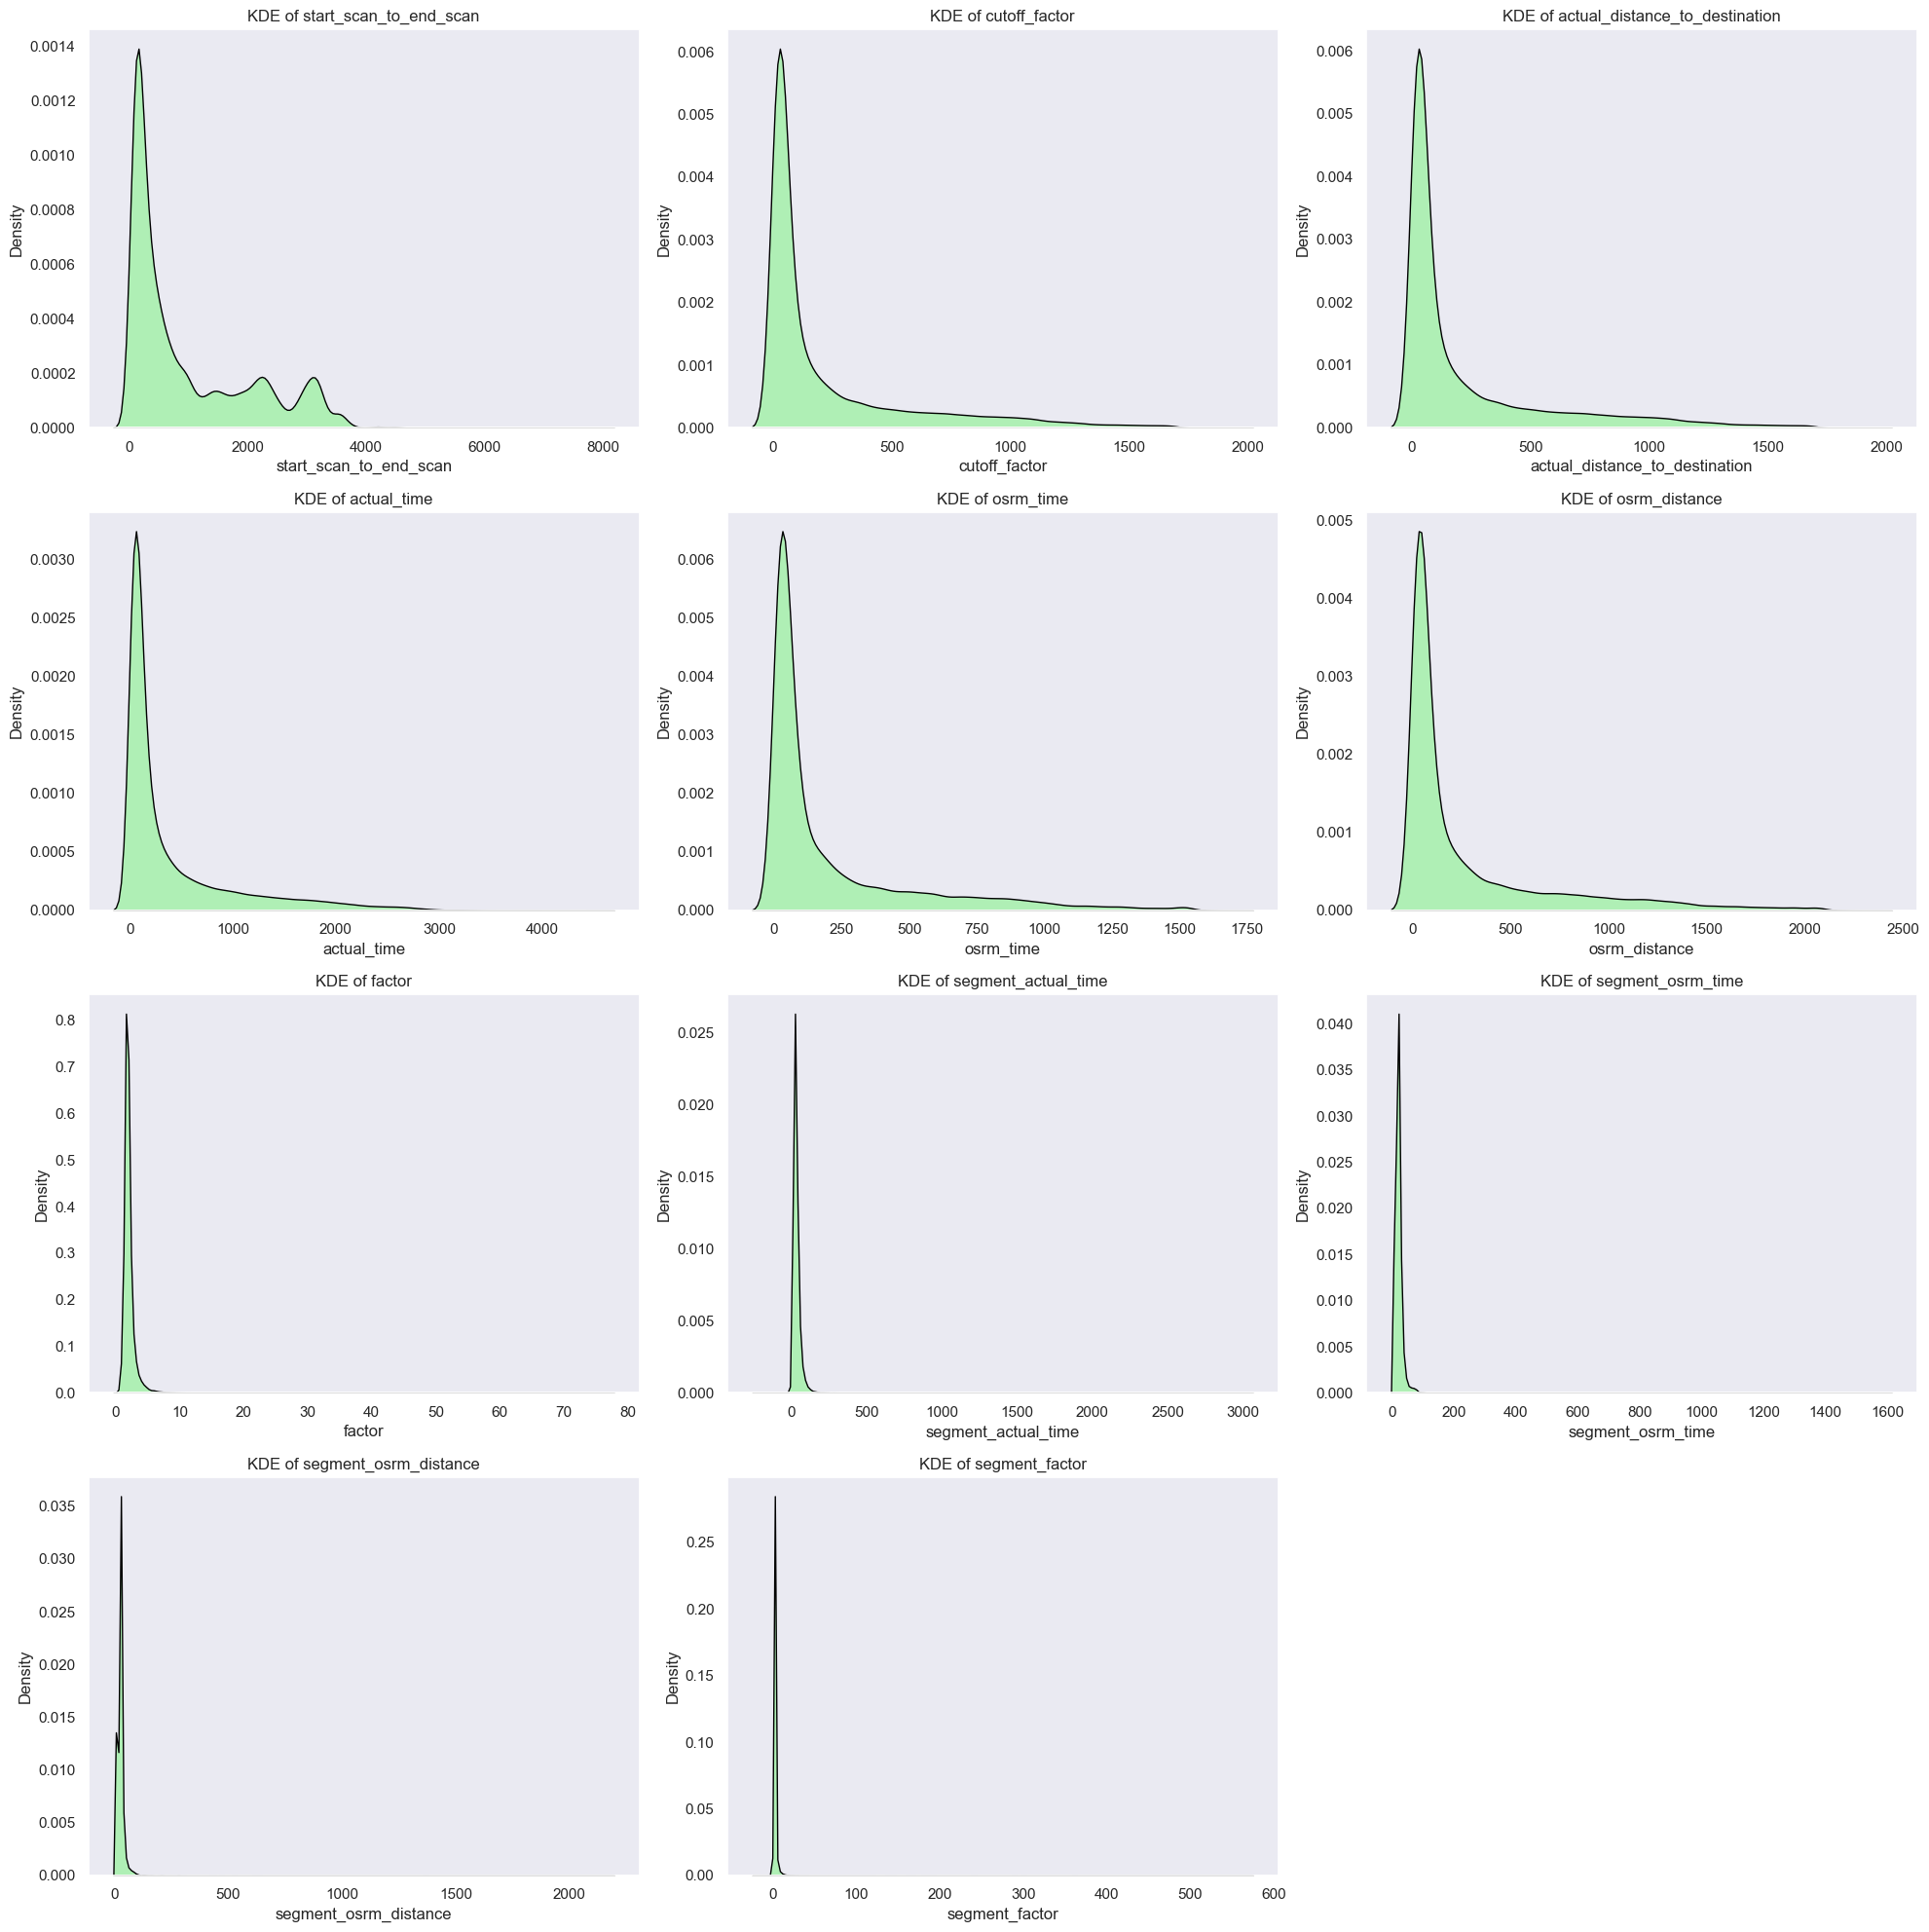

In [67]:
# Set plot style
sns.set_style(style='dark')

# Set up data plot
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

# Create KDE plots for each numeric column
for i, column in enumerate(numeric_data):
    sns.kdeplot(data=df[column], ax=axes[i], fill=True, color='lime', edgecolor='black')
    axes[i].set_title(f'KDE of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    
    # Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Análisis de eficiencia y estadisticas en función del tipo de ruta, el origen y destino y el tiempo y fecha

In [34]:
df_agg_data

,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_time,initial_format_date,source_state,destination_state,source_coordenates,destination_coordenates,source_clusters,destination_clusters
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,00:00:16,2018-09-12,Madhya Pradesh,Uttar Pradesh,"(23.8143419, 77.5340719)","(27.1303344, 80.859666)",2,2
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,00:00:22,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,00:00:33,2018-09-12,Karnataka,Haryana,"(14.5203896, 75.7223521)","(29.0, 76.0)",1,2
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,00:01:00,2018-09-12,Maharashtra,Maharashtra,"(18.9068356, 75.6741579)","(18.9068356, 75.6741579)",1,1
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,00:02:09,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,23:55:56,2018-10-03,Punjab,Punjab,"(30.9293211, 75.5004841)","(30.9293211, 75.5004841)",2,2
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,23:57:23,2018-10-03,Haryana,Haryana,"(29.0, 76.0)","(29.0, 76.0)",2,2
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,23:57:44,2018-10-03,Uttar Pradesh,Uttar Pradesh,"(27.1303344, 80.859666)","(27.1303344, 80.859666)",2,2
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,23:59:14,2018-10-03,Tamil Nadu,Tamil Nadu,"(10.9094334, 78.3665347)","(10.9094334, 78.3665347)",1,1


## Impacto del cutoff factor en la duración de los servicios

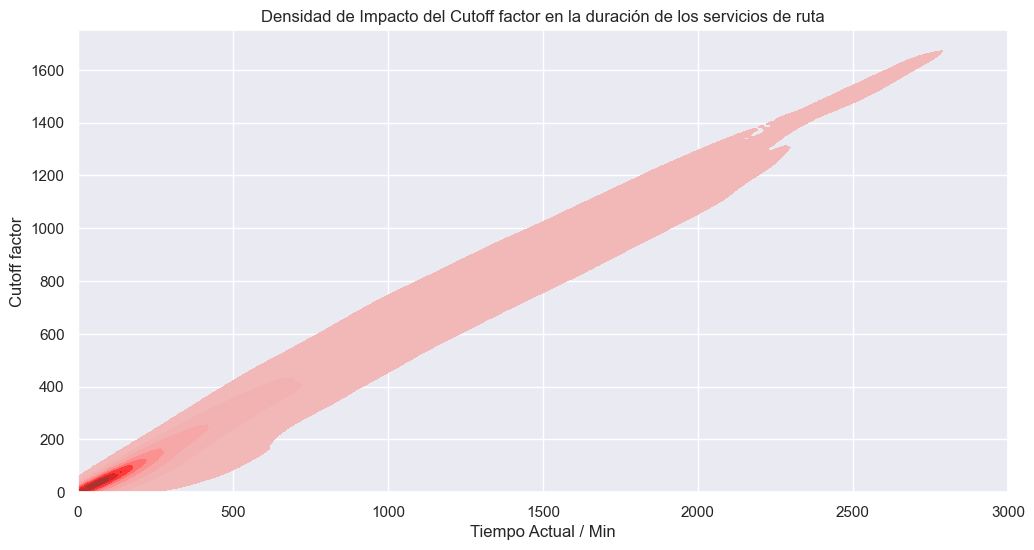

In [75]:
# Set plot style
sns.set_style(style='darkgrid')

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='actual_time', y='cutoff_factor', fill=True, color='red')
plt.xlim(0, 3000)
plt.ylim(0, 1750)
plt.title('Densidad de Impacto del Cutoff factor en la duración de los servicios de ruta')
plt.xlabel('Tiempo Actual / Min')
plt.ylabel('Cutoff factor')

plt.show()

## Evaluación de la eficiencia

In [36]:
# Define ratio osrm_time and actual_time
efficiency_threshold = 1
df_agg_data['efficiency'] = df_agg_data['segment_actual_time']/df_agg_data['segment_osrm_time']

inefficient_data = df_agg_data[df_agg_data['efficiency'] > efficiency_threshold]

print(f"Filas con los datos de una eficiencia baja del tiempo estimado y el tiempo real: ")
inefficient_data



Filas con los datos de una eficiencia baja del tiempo estimado y el tiempo real: 


,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_time,initial_format_date,source_state,destination_state,source_coordenates,destination_coordenates,source_clusters,destination_clusters,efficiency
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,00:00:16,2018-09-12,Madhya Pradesh,Uttar Pradesh,"(23.8143419, 77.5340719)","(27.1303344, 80.859666)",2,2,1.535714
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,00:00:22,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1,2.169231
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,00:00:33,2018-09-12,Karnataka,Haryana,"(14.5203896, 75.7223521)","(29.0, 76.0)",1,2,1.704276
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,00:01:00,2018-09-12,Maharashtra,Maharashtra,"(18.9068356, 75.6741579)","(18.9068356, 75.6741579)",1,1,3.687500
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,00:02:09,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1,2.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,23:55:56,2018-10-03,Punjab,Punjab,"(30.9293211, 75.5004841)","(30.9293211, 75.5004841)",2,2,1.322581
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,23:57:23,2018-10-03,Haryana,Haryana,"(29.0, 76.0)","(29.0, 76.0)",2,2,1.909091
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,23:57:44,2018-10-03,Uttar Pradesh,Uttar Pradesh,"(27.1303344, 80.859666)","(27.1303344, 80.859666)",2,2,3.193182
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,23:59:14,2018-10-03,Tamil Nadu,Tamil Nadu,"(10.9094334, 78.3665347)","(10.9094334, 78.3665347)",1,1,1.167421


In [37]:
inefficient_data['day_of_week'] = pd.to_datetime(inefficient_data['initial_format_date']).dt.dayofweek

/var/folders/c5/6k9kh5sn611bh6r7qbhvznnw0000gn/T/ipykernel_2196/2912588951.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



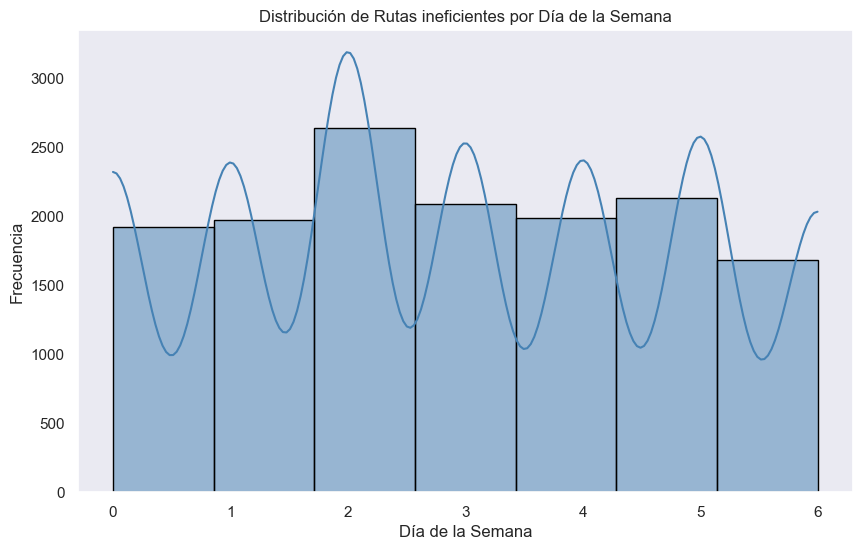

In [69]:
# Set plot style
sns.set_style(style='dark')

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(inefficient_data['day_of_week'], bins=7, kde=True, fill=True, color='steelblue', edgecolor='black')
plt.title('Distribución de Rutas ineficientes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
inefficient_data

,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_time,initial_format_date,source_state,destination_state,source_coordenates,destination_coordenates,source_clusters,destination_clusters,efficiency,day_of_week
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,00:00:16,2018-09-12,Madhya Pradesh,Uttar Pradesh,"(23.8143419, 77.5340719)","(27.1303344, 80.859666)",2,2,1.535714,2
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,00:00:22,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1,2.169231,2
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,00:00:33,2018-09-12,Karnataka,Haryana,"(14.5203896, 75.7223521)","(29.0, 76.0)",1,2,1.704276,2
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,00:01:00,2018-09-12,Maharashtra,Maharashtra,"(18.9068356, 75.6741579)","(18.9068356, 75.6741579)",1,1,3.687500,2
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,00:02:09,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1,2.956522,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,23:55:56,2018-10-03,Punjab,Punjab,"(30.9293211, 75.5004841)","(30.9293211, 75.5004841)",2,2,1.322581,2
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,23:57:23,2018-10-03,Haryana,Haryana,"(29.0, 76.0)","(29.0, 76.0)",2,2,1.909091,2
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,23:57:44,2018-10-03,Uttar Pradesh,Uttar Pradesh,"(27.1303344, 80.859666)","(27.1303344, 80.859666)",2,2,3.193182,2
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,23:59:14,2018-10-03,Tamil Nadu,Tamil Nadu,"(10.9094334, 78.3665347)","(10.9094334, 78.3665347)",1,1,1.167421,2


#### NOTA: Para no afectar las demás variables, extraer las filas segment_actual_time y segment_osrm_time de dataframe df

In [40]:
# Calculate average times by state
efficiency_stats = df_agg_data.groupby('source_state').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()

efficiency_stats['time_difference'] = efficiency_stats['segment_actual_time'] - efficiency_stats['segment_osrm_time']

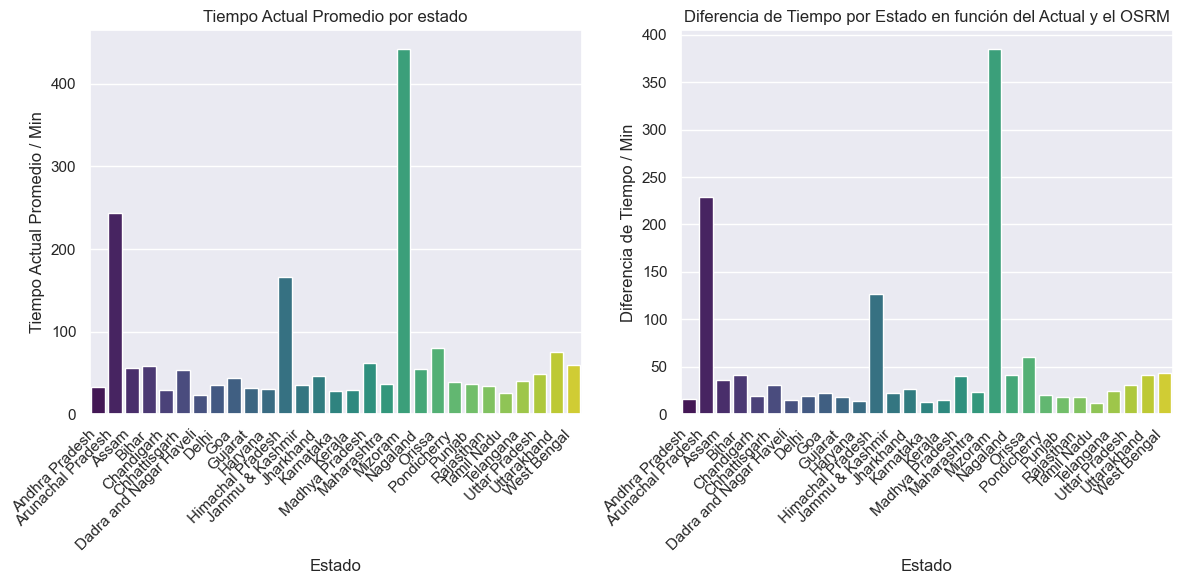

In [76]:
# Set plot style
sns.set_style(style='darkgrid')

plt.figure(figsize=(12, 6))

# Barplot for Average Actual Time
plt.subplot(1, 2, 1)
sns.barplot(data=efficiency_stats, x='source_state', y='segment_actual_time', palette='viridis', hue='source_state', legend=False)
plt.title('Tiempo Actual Promedio por estado')
plt.xlabel('Estado')
plt.ylabel('Tiempo Actual Promedio / Min')
plt.xticks(rotation=45, ha='right')

# Barplot for Time Difference
plt.subplot(1, 2, 2)
sns.barplot(data=efficiency_stats, x='source_state', y='time_difference', palette='viridis', hue='source_state', legend=False)
plt.title('Diferencia de Tiempo por Estado en función del Actual y el OSRM')
plt.xlabel('Estado')
plt.ylabel('Diferencia de Tiempo / Min')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Tiempo real promedio por tipo de ruta

In [42]:
# Define seg actual and osrm time mean by route_type 
av_time_route = df_agg_data.groupby('route_type').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()


In [43]:
av_time_route

,route_type,segment_actual_time,segment_osrm_time
0,Carting,28.767197,10.715717
1,FTL,51.418994,23.159548


In [44]:
av_time_route['average_time_difference'] = av_time_route['segment_actual_time'] - av_time_route['segment_osrm_time'] 
av_time_route

,route_type,segment_actual_time,segment_osrm_time,average_time_difference
0,Carting,28.767197,10.715717,18.051479
1,FTL,51.418994,23.159548,28.259446


Text(0, 0.5, 'Diferencia de Tiempo / Min')

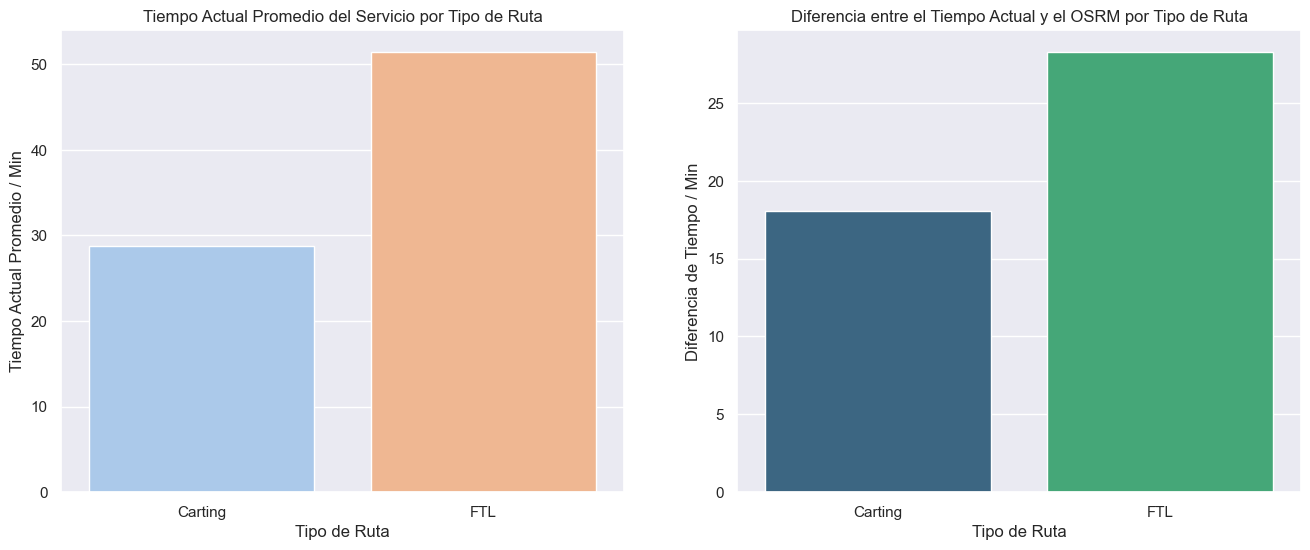

In [79]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.barplot(x='route_type', y='segment_actual_time', data=av_time_route, palette='pastel', hue='route_type', legend=False)
plt.title('Tiempo Actual Promedio del Servicio por Tipo de Ruta')
plt.xlabel('Tipo de Ruta')
plt.ylabel('Tiempo Actual Promedio / Min')

plt.subplot(1, 2, 2)
sns.barplot(x='route_type', y='average_time_difference', data=av_time_route, palette='viridis', hue='route_type', legend=False)
plt.title('Diferencia entre el Tiempo Actual y el OSRM por Tipo de Ruta')
plt.xlabel('Tipo de Ruta')
plt.ylabel('Diferencia de Tiempo / Min')

## Estadísticas según el conjunto de datos del tiempo del recorrido

In [46]:
# Get seg actuanl and osrm time by initial_format_date
performanceby_date = df_agg_data.groupby('initial_format_date').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()


In [47]:
performanceby_date

,initial_format_date,segment_actual_time,segment_osrm_time
0,2018-09-12,39.059099,15.310612
1,2018-09-13,34.580849,15.089529
2,2018-09-14,37.444894,15.236201
3,2018-09-15,38.666224,15.860077
4,2018-09-16,39.116707,17.716594
5,2018-09-17,35.761051,15.515735
6,2018-09-18,36.988747,15.320855
7,2018-09-19,42.338758,17.734815
8,2018-09-20,35.853242,15.931395
9,2018-09-21,38.105119,15.737729


In [48]:
performanceby_date['time_difference'] = performanceby_date['segment_actual_time'] - performanceby_date['segment_osrm_time']


In [49]:
performanceby_date

,initial_format_date,segment_actual_time,segment_osrm_time,time_difference
0,2018-09-12,39.059099,15.310612,23.748488
1,2018-09-13,34.580849,15.089529,19.491320
2,2018-09-14,37.444894,15.236201,22.208694
3,2018-09-15,38.666224,15.860077,22.806147
4,2018-09-16,39.116707,17.716594,21.400112
5,2018-09-17,35.761051,15.515735,20.245316
6,2018-09-18,36.988747,15.320855,21.667893
7,2018-09-19,42.338758,17.734815,24.603943
8,2018-09-20,35.853242,15.931395,19.921847
9,2018-09-21,38.105119,15.737729,22.367390


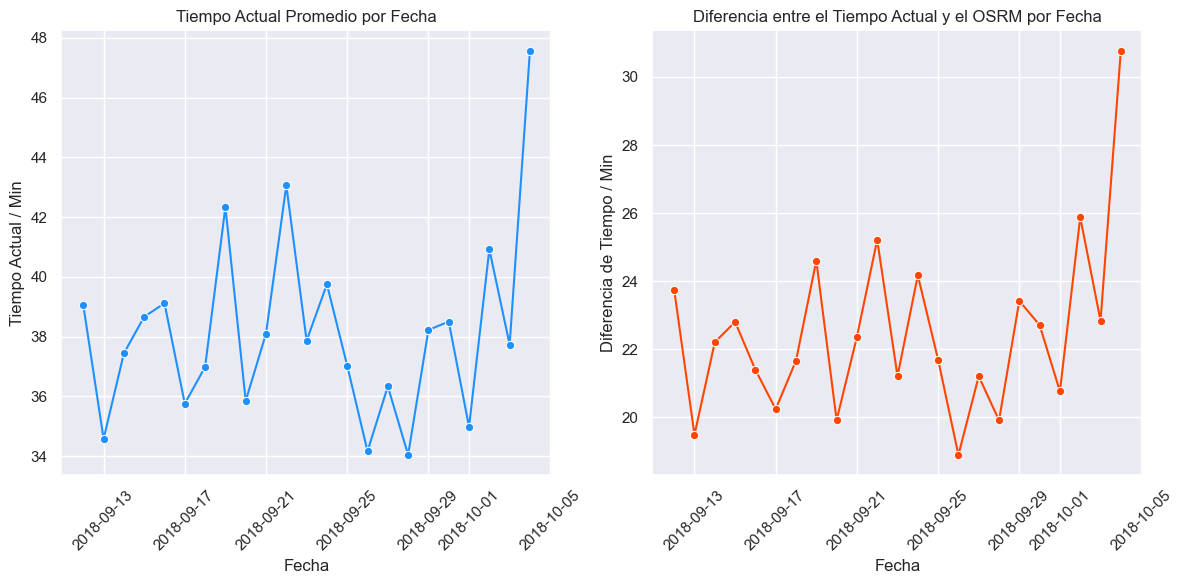

In [80]:
# Set plot style
sns.set_style(style='darkgrid')

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.lineplot(x='initial_format_date', y='segment_actual_time', data=performanceby_date, marker='o', color='dodgerblue')
plt.title('Tiempo Actual Promedio por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Tiempo Actual / Min')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(x='initial_format_date', y='time_difference', data=performanceby_date, marker='o', color='orangered')
plt.title('Diferencia entre el Tiempo Actual y el OSRM por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Tiempo / Min')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()